**Sleep Health and Lifestyle Dataset Analysis Report**


Introduction: The Sleep Health and Lifestyle Dataset provides valuable insights into various factors affecting sleep patterns and overall lifestyle. With 400 rows and 13 columns, the dataset covers a wide range of variables including sleep duration, quality of sleep, physical activity levels, stress levels, BMI categories, cardiovascular health metrics, and the presence of sleep disorders. This report aims to analyze and interpret key findings from the dataset through descriptive statistics and data visualization techniques.

Dataset Overview:

Total Rows: 400 Total Columns: 13 Data Types: Float64, Int64, Object Missing Values: Present in 'Sleep Disorder' column (155 null values)

Key Features of the Dataset:

Comprehensive Sleep Metrics: The dataset includes variables such as sleep duration and quality, allowing for the exploration of sleep patterns and factors influencing sleep.

Lifestyle Factors: Physical activity levels and stress levels are included, providing insights into the impact of lifestyle on sleep health.

Cardiovascular Health: Blood pressure and heart rate measurements offer an understanding of participants' cardiovascular health.

Sleep Disorder Analysis: The presence or absence of sleep disorders such as Insomnia and Sleep Apnea enables the identification of individuals with specific sleep-related issues.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [61]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [62]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [64]:
df.drop("Person ID",axis=1,inplace=True)


In [65]:
df.isnull().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [66]:
print(df['Sleep Disorder'].value_counts())

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64


**variables selected :**

Gender


qualiy of sleep


BMI categoryory

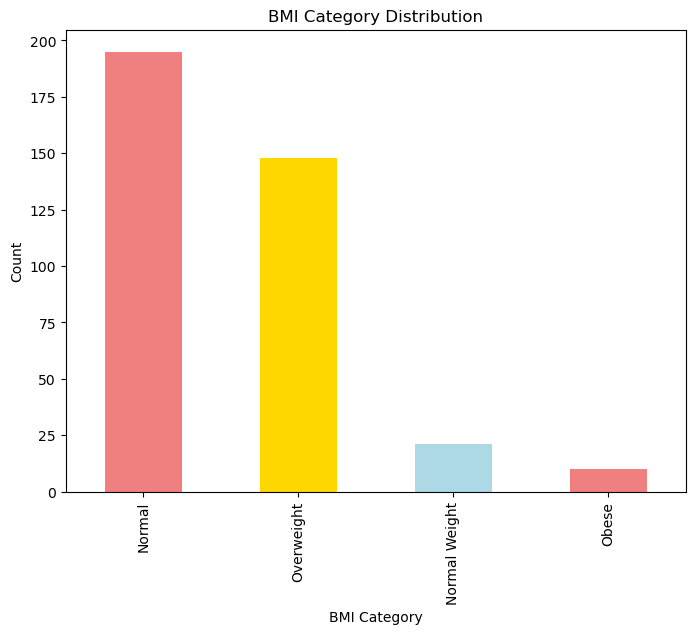

In [69]:
## bar plot for BMI category

plt.figure(figsize=(8, 6))
bmi_category_counts = df['BMI Category'].value_counts()
bmi_category_counts.plot(kind='bar', color=['lightcoral', 'gold', 'lightblue'])
plt.title('BMI Category Distribution')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

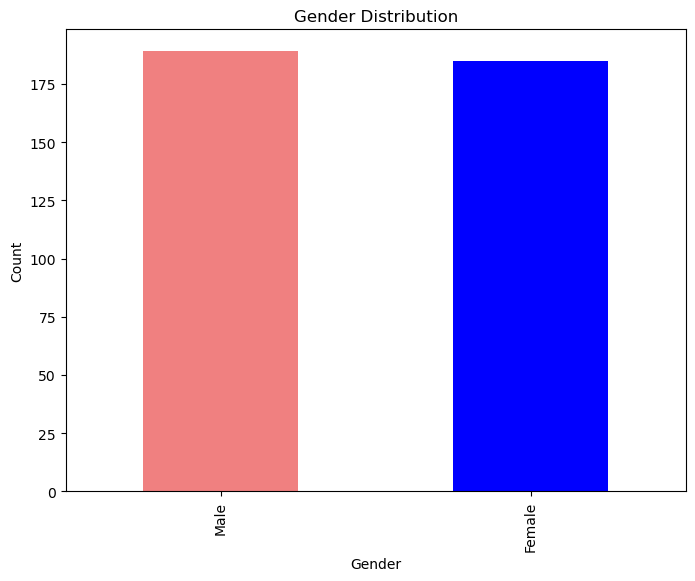

In [70]:
plt.figure(figsize=(8, 6))
gender_counts = df['Gender'].value_counts()
gender_counts.plot(kind='bar', color=['lightcoral', 'blue'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

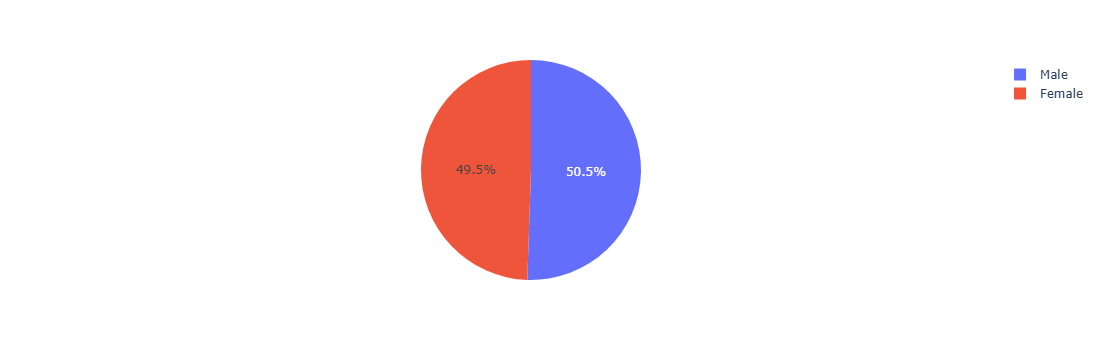

In [71]:
# pie chart for Gender
gender_count = df["Gender"].value_counts().reset_index()
fig = px.pie(gender_count,values='count',names="Gender")
fig.show()

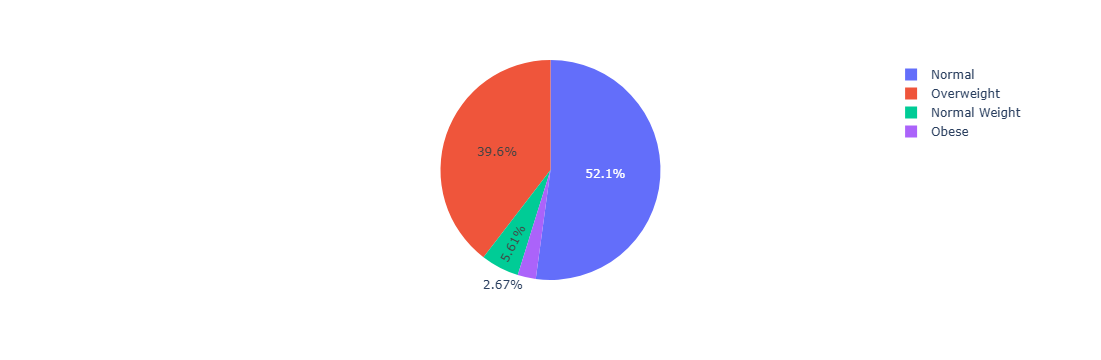

In [72]:
# pie chart for Gender
bmi_count = df["BMI Category"].value_counts().reset_index()
fig = px.pie(bmi_count,values='count',names="BMI Category")
fig.show()

<Figure size 1200x1200 with 0 Axes>

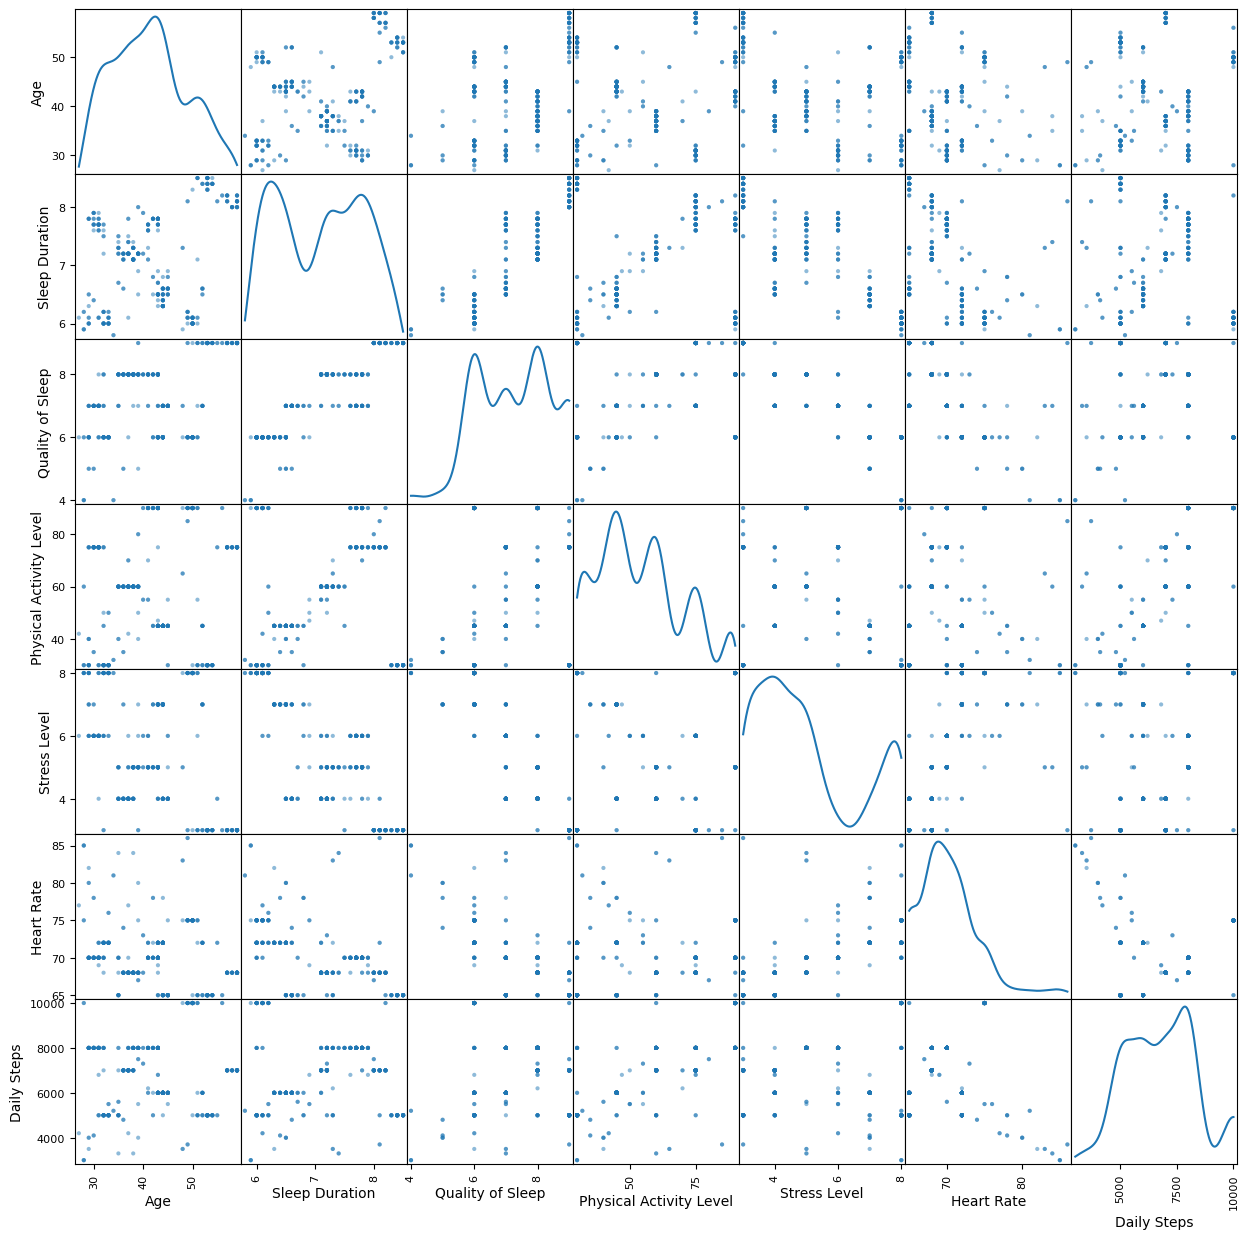

In [73]:
from pandas.plotting import scatter_matrix
features = df.columns
plt.figure(figsize=(12, 12))
scatter_matrix(df[features], figsize=(15, 15), diagonal='kde')
plt.show()

In [74]:
df = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df = df.rename(columns={0: 'BloodPressure_Upper', 1: 'BloodPressure_Lower'})
df['BloodPressure_Upper'] = df['BloodPressure_Upper'].astype(float)
df['BloodPressure_Lower'] = df['BloodPressure_Lower'].astype(float)

In [75]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper,BloodPressure_Lower
0,1,27,9,6.1,6,42,6,3,77,4200,2,126.0,83.0
1,1,28,1,6.2,6,60,8,0,75,10000,2,125.0,80.0
2,1,28,1,6.2,6,60,8,0,75,10000,2,125.0,80.0
3,1,28,6,5.9,4,30,8,2,85,3000,1,140.0,90.0
4,1,28,6,5.9,4,30,8,2,85,3000,1,140.0,90.0


In [76]:
df.corr()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper,BloodPressure_Lower
Gender,1.000000,-0.596358,-0.219113,-0.121579,-0.291366,0.001454,0.396018,-0.352060,0.217105,-0.014509,0.161131,-0.210527,-0.268378
Age,-0.596358,1.000000,0.231188,0.344709,0.473734,0.178993,-0.422344,0.511329,-0.225606,0.057973,-0.303962,0.605878,0.593839
Occupation,-0.219113,0.231188,1.000000,-0.325775,-0.278071,-0.103660,0.021123,0.699504,0.043928,-0.105877,-0.600787,0.518561,0.521835
Sleep Duration,-0.121579,0.344709,-0.325775,1.000000,0.883213,0.212360,-0.811023,-0.376358,-0.516455,-0.039533,0.382045,-0.180406,-0.166570
Quality of Sleep,-0.291366,0.473734,-0.278071,0.883213,1.000000,0.192896,-0.898752,-0.312562,-0.659865,0.016791,0.357477,-0.121632,-0.110151
Physical Activity Level,0.001454,0.178993,-0.103660,0.212360,0.192896,1.000000,-0.034134,0.077156,0.136971,0.772723,0.109225,0.265416,0.382651
Stress Level,0.396018,-0.422344,0.021123,-0.811023,-0.898752,-0.034134,1.000000,0.163895,0.670026,0.186829,-0.181296,0.102818,0.091811
BMI Category,-0.352060,0.511329,0.699504,-0.376358,-0.312562,0.077156,0.163895,1.000000,0.295585,-0.005059,-0.725786,0.714057,0.750869
Heart Rate,0.217105,-0.225606,0.043928,-0.516455,-0.659865,0.136971,0.670026,0.295585,1.000000,-0.030309,-0.220913,0.294143,0.271092
Daily Steps,-0.014509,0.057973,-0.105877,-0.039533,0.016791,0.772723,0.186829,-0.005059,-0.030309,1.000000,0.161275,0.103342,0.241986


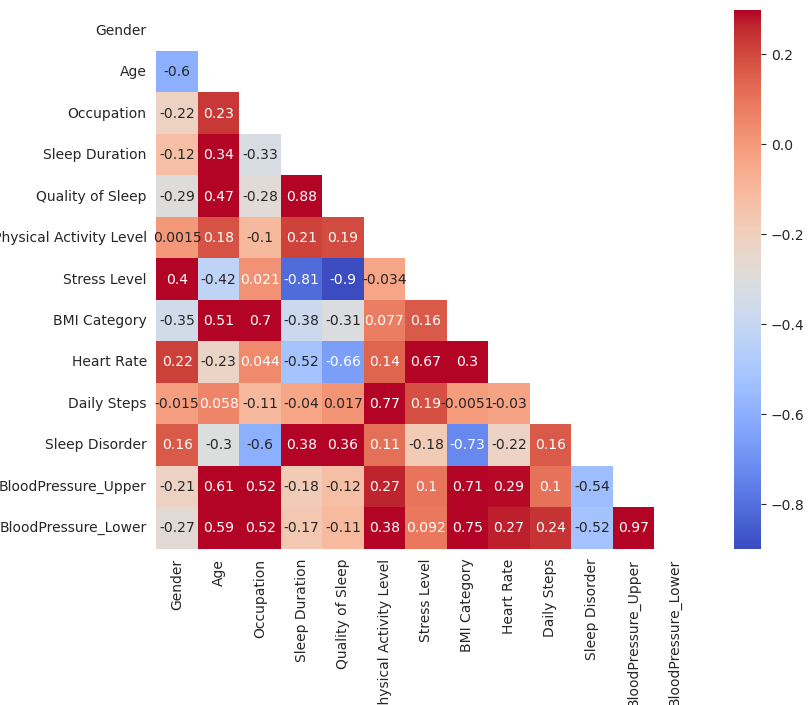

In [77]:
import seaborn as sns
def corr_vis(corr) :
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 7))
        g = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap='coolwarm')
        g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 10)

num_corr = df.corr()
corr_vis(df.corr())

<Figure size 800x600 with 0 Axes>

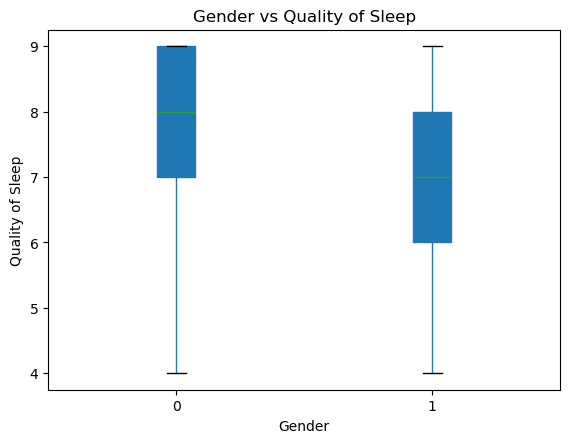

<Figure size 800x600 with 0 Axes>

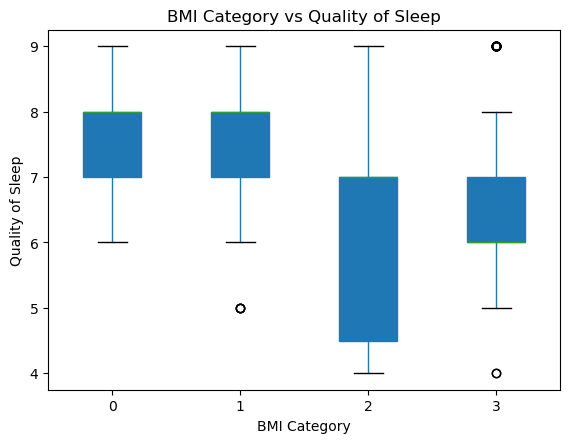

In [78]:
# Box plot: Gender vs Quality of Sleep
plt.figure(figsize=(8, 6))
df.boxplot(column='Quality of Sleep', by='Gender', grid=False, patch_artist=True)
plt.title('Gender vs Quality of Sleep')
plt.suptitle('')  # Removing the default super title
plt.xlabel('Gender')
plt.ylabel('Quality of Sleep')
plt.show()

# Box plot: BMI Category vs Quality of Sleep
plt.figure(figsize=(8, 6))
df.boxplot(column='Quality of Sleep', by='BMI Category', grid=False, patch_artist=True)
plt.title('BMI Category vs Quality of Sleep')
plt.suptitle('')
plt.xlabel('BMI Category')
plt.ylabel('Quality of Sleep')
plt.show()

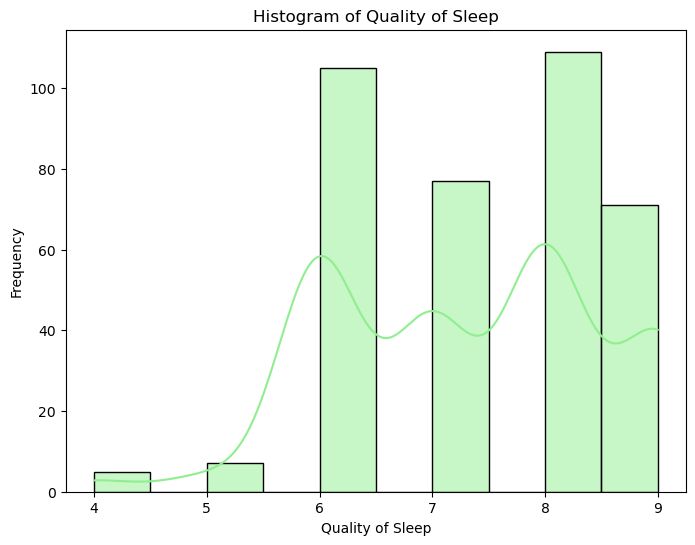

In [79]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(df['Quality of Sleep'], bins=10, kde=True, color='lightgreen')
plt.title('Histogram of Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Frequency')

# Show the plot
plt.show()

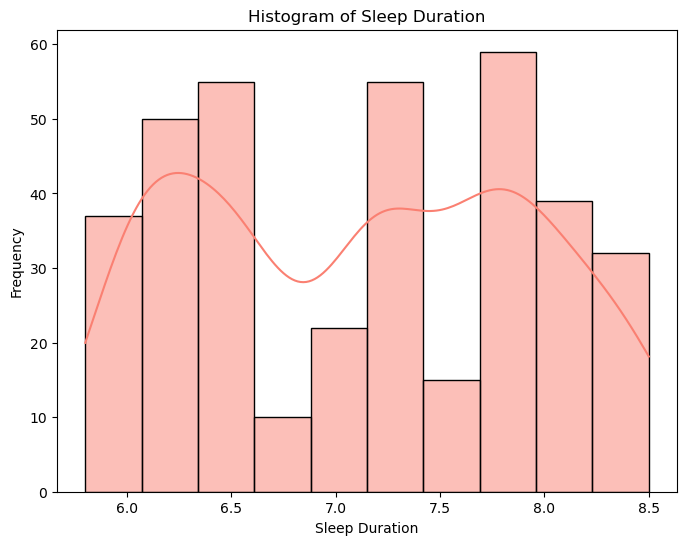

In [80]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Sleep Duration'], bins=10, kde=True, color='salmon')
plt.title('Histogram of Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [81]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [82]:
df.dropna()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper,BloodPressure_Lower
0,1,27,9,6.1,6,42,6,3,77,4200,2,126.0,83.0
1,1,28,1,6.2,6,60,8,0,75,10000,2,125.0,80.0
2,1,28,1,6.2,6,60,8,0,75,10000,2,125.0,80.0
3,1,28,6,5.9,4,30,8,2,85,3000,1,140.0,90.0
4,1,28,6,5.9,4,30,8,2,85,3000,1,140.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,5,8.1,9,75,3,3,68,7000,1,140.0,95.0
370,0,59,5,8.0,9,75,3,3,68,7000,1,140.0,95.0
371,0,59,5,8.1,9,75,3,3,68,7000,1,140.0,95.0
372,0,59,5,8.1,9,75,3,3,68,7000,1,140.0,95.0


In [83]:
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
BloodPressure_Upper        0
BloodPressure_Lower        0
dtype: int64